### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.evaluation.evaluator_manager import EvaluatorManager
from src.evaluation.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.data_analyzer import DataAnalyzer as data_analyzer 

### Choosing the desired configuration

In [4]:
# Tree-Cycles.................................................................
# TopSelect
# config_f_name = 'E6-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc'
# Union
# config_f_name = 'E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc'
# Intersection
# config_f_name = 'E8-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc'
# Frequency
# config_f_name = 'E9-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc'
# Random
# config_f_name = 'E10-TCR-128-28_GCN_Ens[OBS+2xiRand+RSGG]-Rand.jsonc'
# Bidirectional
# config_f_name = 'E12-TCR-128-28_GCN_Ens[OBS+2xiRand+2xRSGG]-Bidirectional.jsonc'
# Stochastic
config_f_name = 'E13-TCR-128-28_GCN_Ens[OBS+2xiRand+2xRSGG]-Stochastic.jsonc'

# ASD........................................................................
# TopSelect
# config_f_name = 'E1-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc'
# Union
# config_f_name = 'E2-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc'
# Intersection
# config_f_name = 'E3-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc'
# Frequency
# config_f_name = 'E4-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc'
# Random
# config_f_name = 'E5-ASD_ASDO_Ens[OBS+2xiRand+RSGG]-Rand.jsonc'
# Bidirectional
# config_f_name = 'E11-ASD_ASDO_Ens[OBS+2xiRand+2xRSGG]-Bidirectional.jsonc'


### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()


Generating context for: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/E13-TCR-128-28_GCN_Ens[OBS+2xiRand+2xRSGG]-Stochastic.jsonc
2024-05-29 16:26:16,-994141942 | INFO | 2128208 - Executing: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/E13-TCR-128-28_GCN_Ens[OBS+2xiRand+2xRSGG]-Stochastic.jsonc Run: 2
2024-05-29 16:26:16,-994141913 | INFO | 2128208 - Creating the evaluation manager....................................
2024-05-29 16:26:16,-994141889 | INFO | 2128208 - Creating the paired  evaluators.....................................
2024-05-29 16:26:16,-994141611 | INFO | 2128208 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-29 16:26:16,-994141473 | INFO | 2128208 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-29 16:26:17,-994141208 | INFO | 2128208 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-05-29 16:26:17,-994140692 | INFO | 2128208 - Instantiating: torch.optim.RMSprop
2024-05-29 16:26:17,-994140690 | INFO | 2128208 -

AttributeError: module 'src.explainer.ensemble.aggregators.stochastic' has no attribute 'ExplanationStochasticAggregator'

### Aggregating the stats

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-05-29 13:20:08,-1005309652 | INFO | 1857512 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-29 13:20:08,-1005309629 | INFO | 1857512 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-29 13:20:08,-1005309627 | INFO | 1857512 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-29 13:20:08,-1005309627 | INFO | 1857512 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-29 13:20:08,-1005309625 | INFO | 1857512 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-29 13:20:08,-1005309625 | INFO | 1857512 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-29 13:20:08,-1005309624 | INFO | 1857512 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-29 13:20:08,-1005309613 | INFO | 1857512 - Instantiating: src.evaluation.evaluation_metric_runtime.Runt

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationBidirectionalSearch,2.443150,0.000000,1.984127,0.000000,591.992188,0.000000,0.984375,0.000000,0.034840,0.000000,0.984375,0.000000,0.992188,0.000000
1,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationTopSelect,1.045758,0.409172,5.365289,0.034711,504.410156,170.761719,0.960938,0.015625,0.099162,0.003256,0.945312,0.015625,0.992188,0.000000
2,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationFrequency,0.863032,0.000000,1.526316,0.000000,561.476562,0.000000,0.148438,0.000000,0.011643,0.000000,0.148438,0.000000,0.976562,0.000000
3,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationIntersection,0.852929,0.000000,1.647059,0.000000,557.726562,0.000000,0.132812,0.000000,0.014849,0.000000,0.132812,0.000000,0.992188,0.000000
4,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationRandom,1.712488,0.000000,1.863208,0.000000,455.171875,0.000000,0.828125,0.000000,0.027574,0.000000,0.812500,0.000000,0.992188,0.000000
5,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationUnion,1.206500,0.000000,24.570652,0.000000,547.406250,0.000000,0.718750,0.000000,0.447030,0.000000,0.687500,0.000000,0.976562,0.000000
6,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ObliviousBidirectionalSearchExplainer,0.236774,0.000000,1.314050,0.000000,164.640625,0.000000,0.945312,0.000000,0.022194,0.000000,0.945312,0.000000,1.000000,0.000000
7,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,DCESExplainer,0.086789,0.000000,44.679688,0.000000,129.000000,0.000000,1.000000,0.000000,0.801405,0.000000,1.000000,0.000000,1.000000,0.000000
8,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,4.155696,0.326201,9.921818,1.731923,1019.548182,115.468089,1.000000,0.000000,0.012867,0.002268,0.547273,0.316118,0.773636,0.158059


### Visualizing individual instances

In [9]:
evaluator = eval_manager.evaluators[0]
evaluator

In [10]:
exp = evaluator.explanations[2]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

In [12]:
changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [13]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: []
removed_edges: [(6, 25), (16, 25)]
added nodes: []
removed nodes: []


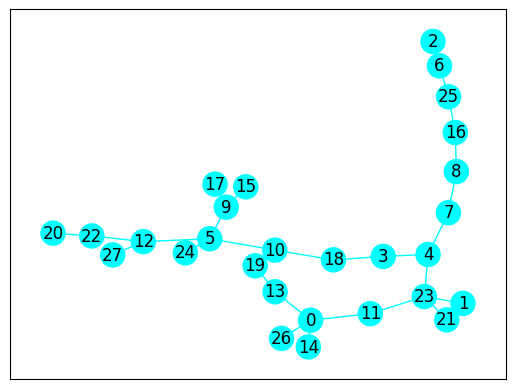

In [14]:
pos = data_analyzer.draw_graph(og_inst)

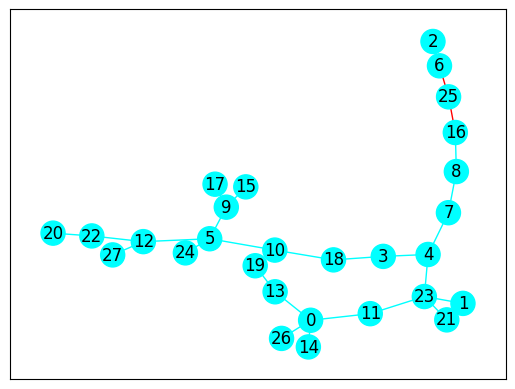

In [15]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

In [18]:
exp.explainer.name

'ExplanationUnion-550f26dea9a975ab43a0a7601ff14e3b'